In [1]:
#EP PHYS512
#PS6: Random numbers

In [2]:
#Step 1.
    #read in Siever's random points
    #plot them
#Step 2. 
    #rerun his script with my own new file name
    #plot them again
#Step 3.
    #try again with Python's.

In [3]:
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits import mplot3d
import random

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

(30253, 3)


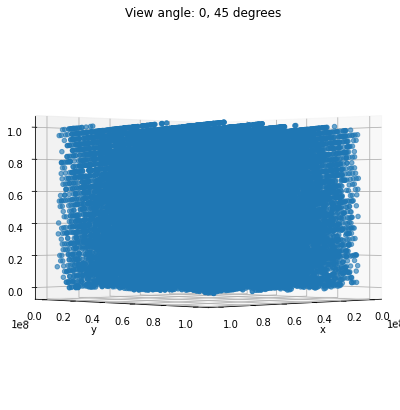

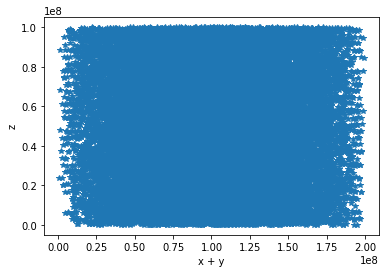

In [4]:
#read in the text file with the random (x, y, z) coordinates
fname = "rand_points.txt"
data = np.genfromtxt(fname)
print(data.shape)
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

#method 1: reorienting view angle on 3D plot
mpl.figure(figsize = (10, 7))
ax = mpl.axes(projection ="3d")
# ax.view_init(0, 45) #can  see planes on top
ax.view_init(0,45)
ax.scatter3D(x, y, z)
mpl.title('View angle: 0, 45 degrees')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.show()

#method 2: plotting a*x + b*y, z for some chosen a and b
a = 1
b = 1
mpl.figure()
mpl.plot(a*x + b*y, z, '*')
mpl.xlabel('x + y')
mpl.ylabel('z')
mpl.show()

We can see in both of these representations about ~30 planes seen as straight lines cutting across the field of view. The fact that all the 'randomly' generated numbers are restricted to these planes means that they're not very random after all.

(30253, 3)


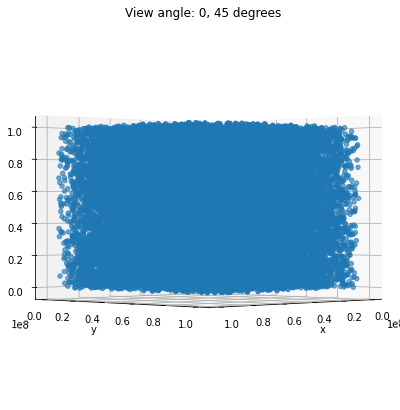

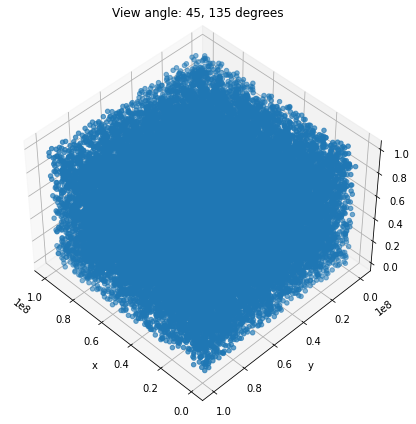

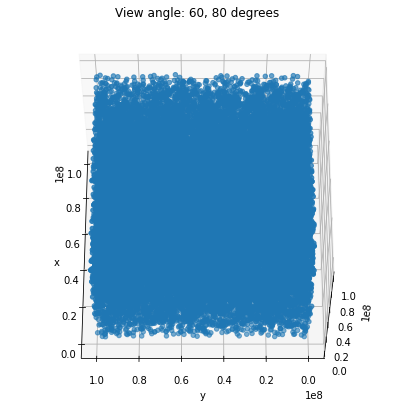

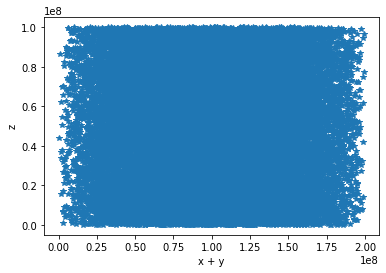

In [5]:
#step 2: trying to reproduce with my cpu's random number generator
#import test_broken_libc.py #it ran it the first time I imported it

#had points exported to different file
fname2 = "rand_points_EP.txt"
data = np.genfromtxt(fname2)
print(data.shape)
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

#method 1: reorienting view angle on 3D plot
mpl.figure(figsize = (10, 7))
ax = mpl.axes(projection ="3d")
# ax.view_init(0, 45) #can  see planes on top
ax.view_init(0,45)
ax.scatter3D(x, y, z)
mpl.title('View angle: 0, 45 degrees')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.show()

mpl.figure(figsize = (10, 7))
ax = mpl.axes(projection ="3d")
ax.view_init(45, 135)
ax.scatter3D(x, y, z)
mpl.title('View angle: 45, 135 degrees')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.show()

mpl.figure(figsize = (10, 7))
ax = mpl.axes(projection ="3d")
ax.view_init(60, 180)
ax.scatter3D(x, y, z)
mpl.title('View angle: 60, 80 degrees')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.show()

#method 2: plotting a*x + b*y, z for some chosen a and b
a = 1
b = 1
mpl.figure()
mpl.plot(a*x + b*y, z, '*')
mpl.xlabel('x + y')
mpl.ylabel('z')
mpl.show()

Using libc.so didn't work, but libcidn.so did. However I don't see the same plane structure in these views that I did from Sievers' data. The libcidn.so must be better than libc.so.

In [6]:
#step 3: test with python's random number generator
num = 20000

x2 = np.zeros(num, dtype = 'int32')
y2 = np.zeros(num, dtype = 'int32')
z2 = np.zeros(num, dtype = 'int32')
for ii in range(0, num):
    x2[ii] = random.randint(0, 10**8)
    y2[ii] = random.randint(0, 10**8)
    z2[ii] = random.randint(0, 10**8)

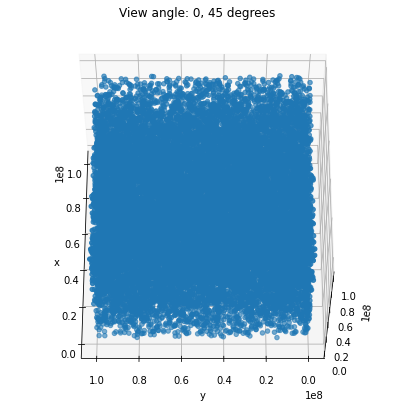

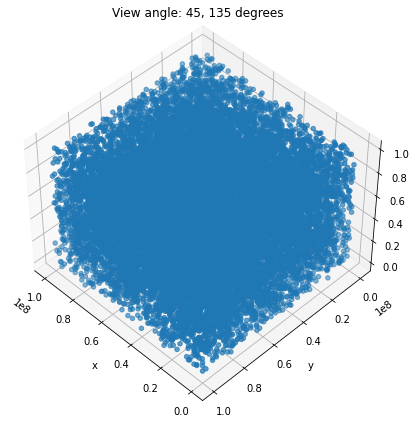

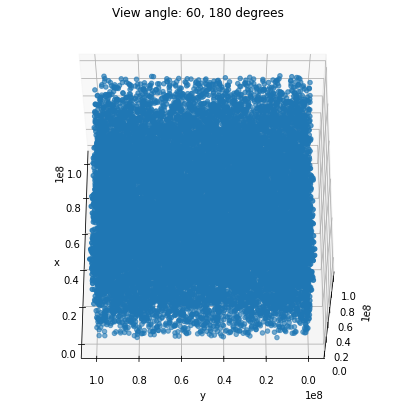

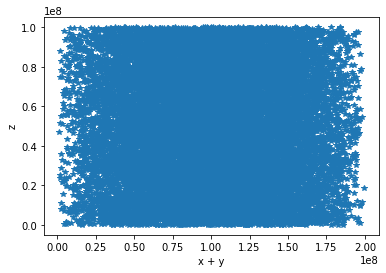

In [7]:
#method 1: reorienting view angle on 3D plot
mpl.figure(figsize = (10, 7))
ax = mpl.axes(projection ="3d")
ax.view_init(0,45)
ax.view_init(60, 180)
ax.scatter3D(x2, y2, z2)
mpl.title('View angle: 0, 45 degrees')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.show()

mpl.figure(figsize = (10, 7))
ax = mpl.axes(projection ="3d")
ax.view_init(45, 135)
ax.scatter3D(x2, y2, z2)
mpl.title('View angle: 45, 135 degrees')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.show()

mpl.figure(figsize = (10, 7))
ax = mpl.axes(projection ="3d")
ax.view_init(60, 180)
ax.scatter3D(x2, y2, z2)
mpl.title('View angle: 60, 180 degrees')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.show()

#method 2: plotting a*x + b*y, z for some chosen a and b
a = 1
b = 1
mpl.figure()
mpl.plot(a*x2 + b*y2, z2, '*')
mpl.xlabel('x + y')
mpl.ylabel('z')
mpl.show()

Looked at a bunch of different views, plotted a couple here. Couldn't find any patterns with python's random number generator. It must be better than C's.